In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Mahsül Verimi Analizi
Bu projemizde veri setimizde bulunan 
* **Region**: Mahsülümüzün yetiştiği coğrafik bölge    
* **Soil_Type**: Mahsülün ekildiği toprak türü     
* **Crop**: Mahsülün türü
* **Rainfall_mm**: Mahsülün büyüme periyodu süresince mm cinsinden aldığı toplam yağış
* **Temperature_Celsius**: Mahsülün büyüme periyodu süresince santigrat derece cinsinden ortalama sıcaklık değeri 
* **Fertilizer_Used**: Gübreleme uygulanıp uygulanmadığı
* **Irrigation_Used**: Sulama yapılıp yapılmadığı
* **Weather_Condition**: Büyüme dönemi boyunca hakim hava durumu
* **Days_to_Harvest**: Mahsülün ekiminden hasadına kadar geçen gün sayısı
* **Yield_tons_per_hectare**: Toplam ürün verimi (hektar başına ton)
  
verileri kullanaraktan yetiştirecek olduğumuz ürünün hangi şartlarda bize optimum verim sağlayabileceğini inceleyeceğiz.

# 1) Veri Setinin Hazırlanması

**Veri Seti :** Agriculture Crop Yield | https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield

In [35]:
df = pd.read_csv("/kaggle/input/agriculture-crop-yield/crop_yield.csv")

In [36]:
import random

def add_random_missing_values(dataframe: df,
                              missing_rate: float = 0.02) -> df:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05
    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [38]:
#FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. 
#Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.

# Uyarısını şimdilik görmezden gelmek için bool türlerini stringe çeviriyoruz.

for i in df.columns:
    if (df[i].dtype == 'bool'):
        df[i] = df[i].replace({True : 'True', False : 'False'})

In [39]:
df_missing = add_random_missing_values(df)
df_ = df_missing.copy()

# 2) Veriye İlk Bakış

In [40]:
df_.shape # veri setimiz 10 sütun ve 100 000 satırdan oluşmaktadır.

(1000000, 10)

# 2.1) Toplam Eksik Değer Yüzdesi

In [41]:
missing_values = df_.isnull().sum()

total_cells = np.product(df_.shape) # veri setimizdeki toplam hücre sayısı
total_missing = missing_values.sum() # tüm sütundaki eksik değerlerin toplamı

percentage = (total_missing/total_cells)*100 # veri setimizdeki eksik değerlerin yüzdelik oranı
print(f"veri setimizdeki eksik değerlerin yüzdelik oranı: {percentage}")

veri setimizdeki eksik değerlerin yüzdelik oranı: 1.9803000000000002


In [42]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  980267 non-null  object 
 1   Soil_Type               980202 non-null  object 
 2   Crop                    980359 non-null  object 
 3   Rainfall_mm             980125 non-null  float64
 4   Temperature_Celsius     980213 non-null  float64
 5   Fertilizer_Used         980242 non-null  object 
 6   Irrigation_Used         980180 non-null  object 
 7   Weather_Condition       980131 non-null  object 
 8   Days_to_Harvest         980121 non-null  float64
 9   Yield_tons_per_hectare  980130 non-null  float64
dtypes: float64(4), object(6)
memory usage: 76.3+ MB


In [43]:
df_.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used            object
Irrigation_Used            object
Weather_Condition          object
Days_to_Harvest           float64
Yield_tons_per_hectare    float64
dtype: object

# 3) Categorical ve Numerical Sütunları Ayırma

In [44]:
numerical_columns = []
categorical_columns = []

for col in df_.columns:
    if (df_[col].dtype == 'object') or (df_[col].dtype == 'categorical'):
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

In [45]:
numerical_columns, categorical_columns

(['Rainfall_mm',
  'Temperature_Celsius',
  'Days_to_Harvest',
  'Yield_tons_per_hectare'],
 ['Region',
  'Soil_Type',
  'Crop',
  'Fertilizer_Used',
  'Irrigation_Used',
  'Weather_Condition'])

In [46]:
# ileride sorun olmaması açısından emin olmak için numerical_columns'daki bütün değerlerimizi sayısal veriye çeviriyoruz.

for col in df_.columns:
    if col in numerical_columns:
        df_[col] = pd.to_numeric(df_[col])
    elif col in categorical_columns:
        df_[col] = pd.Categorical(df_[col])  # object tipini categoric yapınca hafıza kullanımı yarı yarıya düştü.

In [47]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Region                  980267 non-null  category
 1   Soil_Type               980202 non-null  category
 2   Crop                    980359 non-null  category
 3   Rainfall_mm             980125 non-null  float64 
 4   Temperature_Celsius     980213 non-null  float64 
 5   Fertilizer_Used         980242 non-null  category
 6   Irrigation_Used         980180 non-null  category
 7   Weather_Condition       980131 non-null  category
 8   Days_to_Harvest         980121 non-null  float64 
 9   Yield_tons_per_hectare  980130 non-null  float64 
dtypes: category(6), float64(4)
memory usage: 36.2 MB


In [48]:
df_.describe().T 

,count,mean,std,min,25%,50%,75%,max
Rainfall_mm,980125.0,549.972107,259.822213,100.000896,324.921976,550.114932,774.667316,999.997270
Temperature_Celsius,980213.0,27.503063,7.220650,15.000034,21.253145,27.505256,33.750862,39.999997
Days_to_Harvest,980121.0,104.493478,25.954117,60.000000,82.000000,104.000000,127.000000,149.000000
Yield_tons_per_hectare,980130.0,4.649944,1.696592,-1.147613,3.418478,4.652075,5.879993,9.963372


In [49]:
df_[df_.isnull().any(axis=1)] # Genel bir bakış olması açısından veri setinde en az bir tane eksik değer bulunduran satırlara bir göz atıyoruz.

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
3,NaN,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146.0,6.517573
6,West,Clay,NaN,357.902357,31.593431,False,False,Rainy,90.0,2.652392
17,North,Clay,Cotton,416.898632,23.190810,True,NaN,Sunny,95.0,4.858924
20,East,Clay,Cotton,990.267439,24.072052,False,True,Sunny,NaN,6.187396
21,West,NaN,Barley,183.939698,34.227923,True,False,Cloudy,99.0,3.017924
...,...,...,...,...,...,...,...,...,...,...
999981,North,Sandy,Barley,771.012584,15.115510,False,False,Rainy,137.0,NaN
999982,North,Sandy,Rice,120.110365,35.447949,True,NaN,Sunny,134.0,4.275994
999984,North,Silt,Maize,NaN,19.505014,False,False,Cloudy,92.0,3.624284
999987,South,Peaty,Rice,556.723223,31.106024,NaN,True,Sunny,147.0,3.988414


# 4) Numeric Eksik Verilerin Doldurulması
**Numerical NaN verilerimizi farklı yöntemlerle doldurabiliriz:**
*     Dropping columns that have NaN values,
*     Fillna() method,
*     Imputation(isnat, dayanma) dediğimiz ki 2 türden oluşur:
    
    1. NaN değerlerini sütunun mean value'su ile doldurmak     `from sklearn.impute import SimpleImputer`
    2. NaN değerlerini aynı sütunda bir sonra gelen değerle doldurmak    `fillna(method='bfill', axis=0)`

In [50]:
df_numerical = df_[numerical_columns]
df_numerical_ = df_numerical.copy()

In [51]:
df_numerical_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Rainfall_mm             980125 non-null  float64
 1   Temperature_Celsius     980213 non-null  float64
 2   Days_to_Harvest         980121 non-null  float64
 3   Yield_tons_per_hectare  980130 non-null  float64
dtypes: float64(4)
memory usage: 30.5 MB


In [52]:
# fillna() method

df_['Rainfall_mm'] = df_numerical_['Rainfall_mm'].fillna(method='bfill') # sonraki sütunlar için güncellenecek versiyonu tercih ettik.
df_['Temperature_Celsius'] = df_numerical_['Temperature_Celsius'].bfill()
df_['Days_to_Harvest'] = df_numerical_['Days_to_Harvest'].bfill()
df_['Yield_tons_per_hectare'] = df_numerical_['Yield_tons_per_hectare'].bfill()

/tmp/ipykernel_30/3793029798.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_['Rainfall_mm'] = df_numerical_['Rainfall_mm'].fillna(method='bfill') # sonraki sütunlar için güncellenecek versiyonu tercih ettik.


In [53]:
df_.isnull().sum()

Region                    19733
Soil_Type                 19798
Crop                      19641
Rainfall_mm                   1
Temperature_Celsius           0
Fertilizer_Used           19758
Irrigation_Used           19820
Weather_Condition         19869
Days_to_Harvest               0
Yield_tons_per_hectare        0
dtype: int64

# 5) Categoric Eksik Verilerin Doldurulması

In [54]:
df_categorical = df_[categorical_columns]
df_categorical_ = df_categorical.copy()

In [55]:
df_categorical_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Region             980267 non-null  category
 1   Soil_Type          980202 non-null  category
 2   Crop               980359 non-null  category
 3   Fertilizer_Used    980242 non-null  category
 4   Irrigation_Used    980180 non-null  category
 5   Weather_Condition  980131 non-null  category
dtypes: category(6)
memory usage: 5.7 MB


In [56]:
# Her sütunun kendi en sık tekrar eden değerini kullanarak o sütunun Nan değerlerini dolduruyoruz.

for col in df_categorical_.columns:
    most_frequent_value = df_categorical_[col].mode()[0]
    df_[col] = df_categorical_[col].fillna(most_frequent_value)

In [57]:
df_.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               1
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [58]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   Region                  1000000 non-null  category
 1   Soil_Type               1000000 non-null  category
 2   Crop                    1000000 non-null  category
 3   Rainfall_mm             999999 non-null   float64 
 4   Temperature_Celsius     1000000 non-null  float64 
 5   Fertilizer_Used         1000000 non-null  category
 6   Irrigation_Used         1000000 non-null  category
 7   Weather_Condition       1000000 non-null  category
 8   Days_to_Harvest         1000000 non-null  float64 
 9   Yield_tons_per_hectare  1000000 non-null  float64 
dtypes: category(6), float64(4)
memory usage: 36.2 MB


# 6) Boolean(categorical) verileri ele alma
Daha önce futurewarning'den etkilenmemek için string türüne çevirdiğimiz boolean değerlerini **get_dummies()** methoduyla şimdi numeric haline getiriyoruz.

In [59]:
df_.Irrigation_Used

0          True
1          True
2         False
3          True
4          True
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Name: Irrigation_Used, Length: 1000000, dtype: category
Categories (2, object): ['False', 'True']

In [60]:
df_.Fertilizer_Used

0         False
1          True
2         False
3         False
4          True
          ...  
999995    False
999996     True
999997     True
999998    False
999999     True
Name: Fertilizer_Used, Length: 1000000, dtype: category
Categories (2, object): ['False', 'True']

In [61]:
cols = ['Fertilizer_Used', 'Irrigation_Used']

will_be_applied = df_[cols]

df_[cols] = pd.get_dummies(will_be_applied, drop_first=1)

In [62]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   Region                  1000000 non-null  category
 1   Soil_Type               1000000 non-null  category
 2   Crop                    1000000 non-null  category
 3   Rainfall_mm             999999 non-null   float64 
 4   Temperature_Celsius     1000000 non-null  float64 
 5   Fertilizer_Used         1000000 non-null  bool    
 6   Irrigation_Used         1000000 non-null  bool    
 7   Weather_Condition       1000000 non-null  category
 8   Days_to_Harvest         1000000 non-null  float64 
 9   Yield_tons_per_hectare  1000000 non-null  float64 
dtypes: bool(2), category(4), float64(4)
memory usage: 36.2 MB


# 7) Veriden Anlam Çıkarma

In [63]:
# Her bir sütunun Eşsiz değerleri

for col in categorical_columns:
    print(f"{col} sütununda; {df_[col].unique().tolist()} olmak üzere {df_[col].nunique()} eşsiz değer vardır.\n")

Region sütununda; ['West', 'South', 'North', 'East'] olmak üzere 4 eşsiz değer vardır.

Soil_Type sütununda; ['Sandy', 'Clay', 'Loam', 'Silt', 'Peaty', 'Chalky'] olmak üzere 6 eşsiz değer vardır.

Crop sütununda; ['Cotton', 'Rice', 'Barley', 'Soybean', 'Wheat', 'Maize'] olmak üzere 6 eşsiz değer vardır.

Fertilizer_Used sütununda; [False, True] olmak üzere 2 eşsiz değer vardır.

Irrigation_Used sütununda; [True, False] olmak üzere 2 eşsiz değer vardır.

Weather_Condition sütununda; ['Cloudy', 'Rainy', 'Sunny'] olmak üzere 3 eşsiz değer vardır.



In [64]:
df_

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122.0,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140.0,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106.0,1.127443
3,West,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146.0,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110.0,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76.0,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93.0,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108.0,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102.0,2.070159


# 7.1) Bu veriyle neler yapabiliriz?

Elimizde bulunan bir mahsül türünden maksimum verim alabilmemiz için bazı değerleri(uygun hava ve sıcaklık durumu, yetişme bölgesi, gereken yağış miktarı ...vs) girerek bize uygun yetiştirme bölgesinin çıktısını veren şirketimiz adına bir yazılım programlanabilir. Hatta özellikle kısa dönemli ürün verebilen mahsüller için uzun dönemlik hava durumu tahminlerine bakarak hava durumu şartı verimi daha da optimum hale getirilebilir.

In [66]:
# Bölgelerin yağış alma miktarları açısından kıyaslanması

# Bölgelerin sıcaklık değerleri açısından kıyaslanması

# Bölgelerin sıcaklık değerlerine göre sulama gerekir mi gerekmez mi? kıyaslanması

# Toprak türlerine göre gübre ihtiyacı olup olmadığı? Hatta mahsül verimine bir alt sınır koyup bir filtreleme ve sınırın altındaki durumları 
# eleme dahi yapılabilir.

# Genel olarak tüm mahsül tiplerinin uygun şartlarda yetiştiği durumlar ele alınarak hangi mahsül tipinin daha fazla kar getirdiği.

# Mahsül tiplerinin toprak şartlarına göre kıyaslaması (örn. clay'de yetişen pirinç ile silt'de yetişen pirincin verimi)

# mahsül türünün, hasat süresine(ekimden hasata) göre kıyaslaması

# 7.2) Veri Görselleştirme

In [65]:
import seaborn as sns
from matplotlib import pyplot as plt

# 7.2.1) Categoric Değerlerin Görselleştirilmesi

In [79]:
for col in categorical_columns:
    print(df_[col].value_counts())

Region
West     264970
North    245168
South    245005
East     244857
Name: count, dtype: int64
Soil_Type
Sandy     183637
Loam      163529
Chalky    163502
Silt      163338
Clay      163037
Peaty     162957
Name: count, dtype: int64
Crop
Maize      183168
Rice       163495
Barley     163415
Wheat      163403
Cotton     163400
Soybean    163119
Name: count, dtype: int64
Fertilizer_Used
False    509902
True     490098
Name: count, dtype: int64
Irrigation_Used
False    510408
True     489592
Name: count, dtype: int64
Weather_Condition
Sunny     347077
Rainy     326816
Cloudy    326107
Name: count, dtype: int64


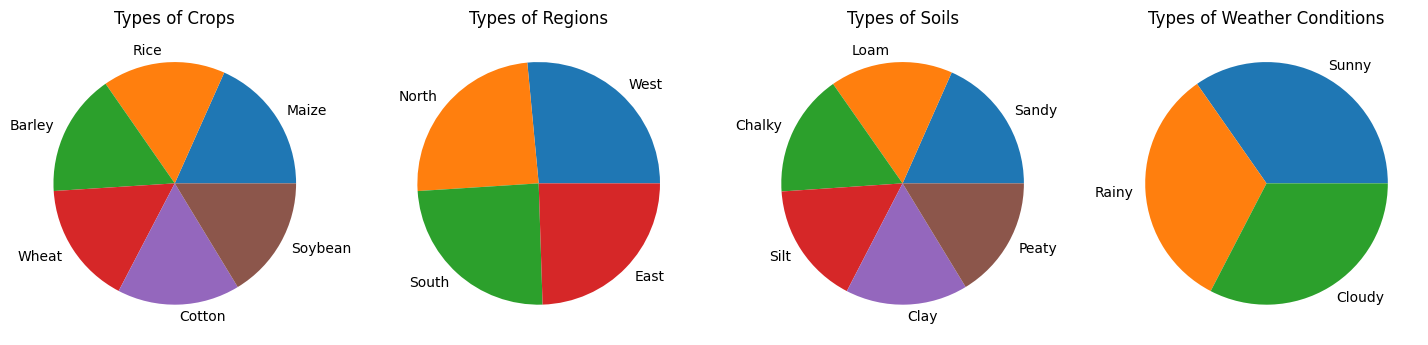

In [77]:
fig = plt.figure(figsize = (18,5))

crop_types = df_['Crop'].value_counts()
first_plot = fig.add_subplot(1,4,1)
first_plot.pie(crop_types, labels=crop_types.index)
first_plot.set_title("Distribution of Types of Crops")

region_types = df_['Region'].value_counts()
second_plot = fig.add_subplot(1,4,2)
second_plot.pie(region_types, labels=region_types.index)
second_plot.set_title("Distribution of Types of Regions")

Soil_Type = df_['Soil_Type'].value_counts()
third_plot = fig.add_subplot(1,4,3)
third_plot.pie(Soil_Type, labels=Soil_Type.index)
third_plot.set_title("Distribution of Types of Soils")

Weather_Condition = df_['Weather_Condition'].value_counts()
fourth_plot = fig.add_subplot(1,4,4)
fourth_plot.pie(Weather_Condition, labels = Weather_Condition.index)
fourth_plot.set_title("Distribution of Types of Weather Conditions")

plt.show()

In [ ]:
# Mahsül türü açısından mahsül verimi
plt.bar(df_['Crop'], df_['Yield_tons_per_hectare'])
plt.set_title("Mahsül türü açısından mahsül verimi")
plt.show()

**Not:** Projemi buraya kadar takip edip incelediğiniz için teşekkür ederim. Görselleştirmenin devamını getirmek istiyordum lakin kaggle "Draft Session Starting..." aşamasında takılı kaldı haliyle yazdığım kodları çalıştıramadım. Bu projedeki destekleriniz için teşekkür eder kolaylıklar dilerim :)

*Umut Ağrıman*